<a href="https://colab.research.google.com/github/tunnu-sahni/ML_Projects/blob/main/clusterdbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [21]:
## import IRIS dataset
iris=datasets.load_iris()

In [5]:
iris_data=pd.DataFrame(iris.data)

In [6]:
iris_data.columns=iris.feature_names

In [7]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [9]:
X_scaled=scaler.fit_transform(iris_data)

In [10]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [12]:
X_scaled.shape

(150, 4)

In [13]:
## Apply the PCA
from sklearn.decomposition import PCA

In [14]:
pca=PCA(n_components=2)

In [15]:
pca

PCA(n_components=2)

In [19]:
pca_scaled.shape

(150, 2)

In [16]:
pca_scaled=pca.fit_transform(X_scaled)

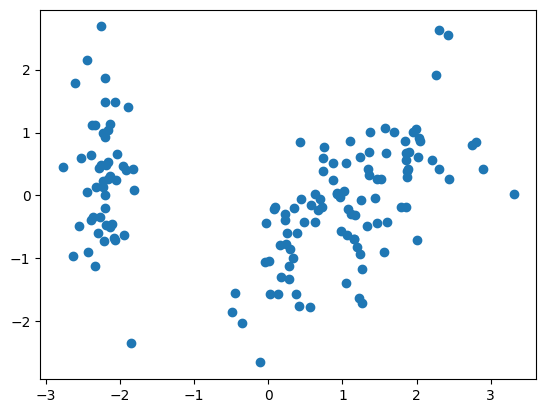

In [17]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'eucledian distance')

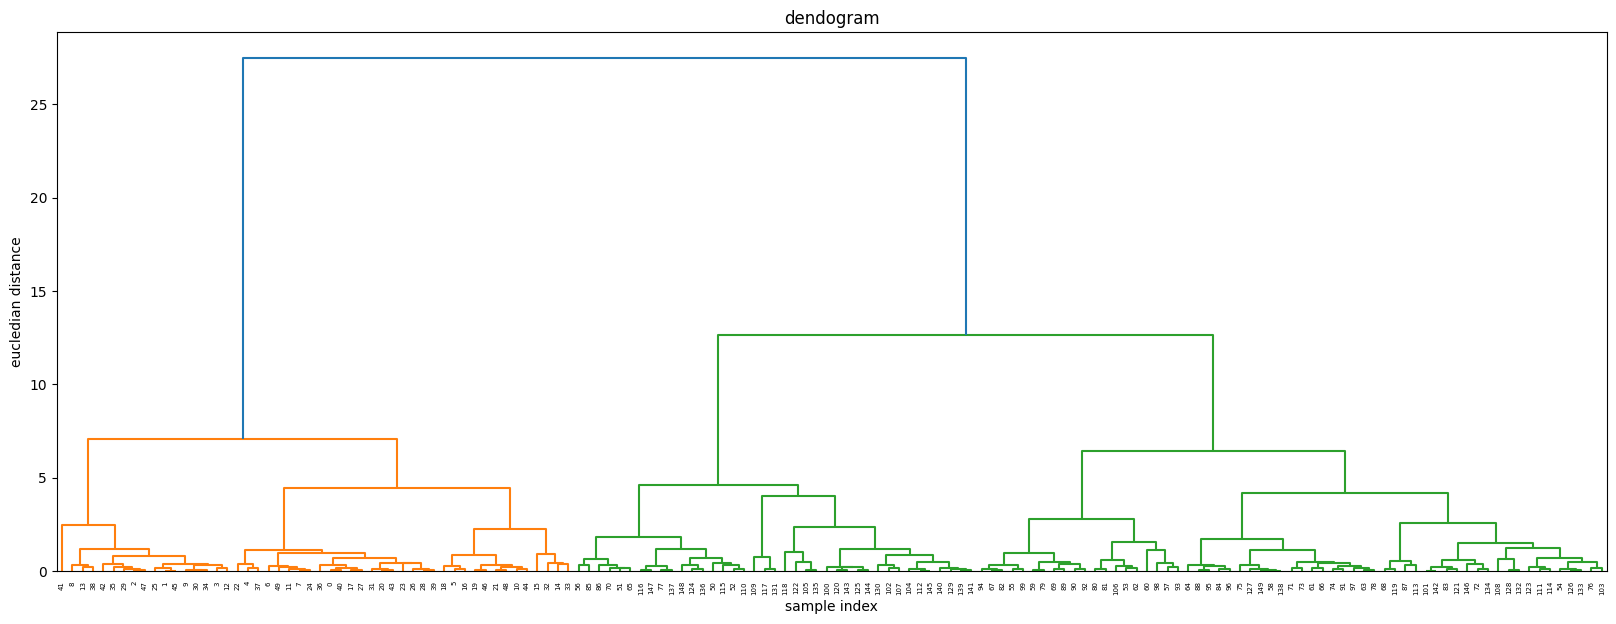

In [22]:
## agglomerative clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sch
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("dendograms")

## create dendogram
sch.dendrogram(sch.linkage(pca_scaled,method='ward'))
plt.title('dendogram')
plt.xlabel('sample index')
plt.ylabel('eucledian distance')

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage="ward")
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [29]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

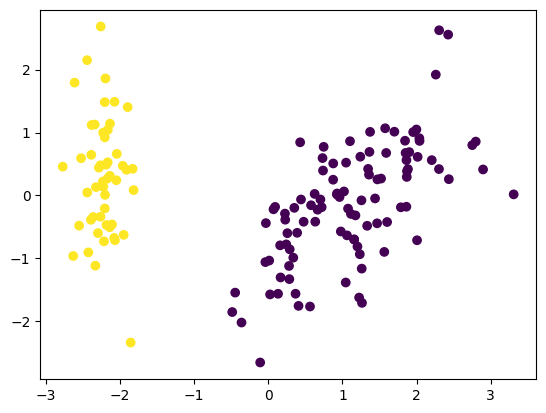

In [26]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

DBSCAN Clustering


In [27]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
x,y=make_moons(n_samples=250,noise=0.05)

In [33]:
x

array([[-1.19938286e-01,  9.04999972e-01],
       [ 1.48075718e+00, -4.26450081e-01],
       [ 5.83637713e-02,  2.30937263e-01],
       [ 1.93726926e+00,  1.41727410e-01],
       [-8.88953048e-01,  5.36788380e-01],
       [-8.52054677e-02,  9.68578159e-01],
       [ 9.01277219e-04,  3.20984816e-01],
       [ 1.05777982e+00,  1.32796987e-01],
       [ 9.51463768e-01, -4.24027202e-01],
       [ 8.40381190e-01, -4.56408145e-01],
       [ 1.18630235e+00, -4.08301199e-01],
       [ 9.73002435e-01,  1.78953542e-01],
       [ 1.92967788e+00,  2.21658562e-01],
       [ 4.88241794e-01,  8.73178790e-01],
       [ 1.66060140e+00, -3.13772805e-01],
       [ 4.98244910e-01, -3.27035886e-01],
       [-1.02330933e+00,  1.58987044e-01],
       [ 5.43648045e-01,  7.52214005e-01],
       [-3.36562587e-01,  8.75047901e-01],
       [ 6.74665670e-01,  6.56896320e-01],
       [ 9.97898287e-01, -5.10482342e-01],
       [ 2.21079562e-01,  1.03951961e+00],
       [ 6.25343194e-01, -4.21202611e-01],
       [-1.

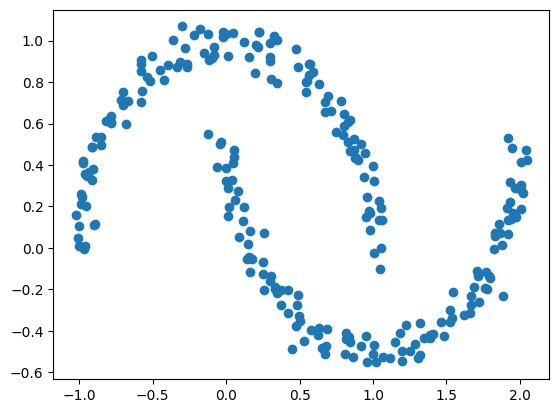

In [34]:
plt.scatter(x[:,0],x[:,1])

In [35]:
## feature scalling (standard scaling)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [36]:
x_scaled=scaler.fit_transform(x)

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
dbcan=DBSCAN(eps=0.05)

In [40]:
dbcan.fit(x_scaled)

DBSCAN(eps=0.05)

In [41]:
dbcan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1

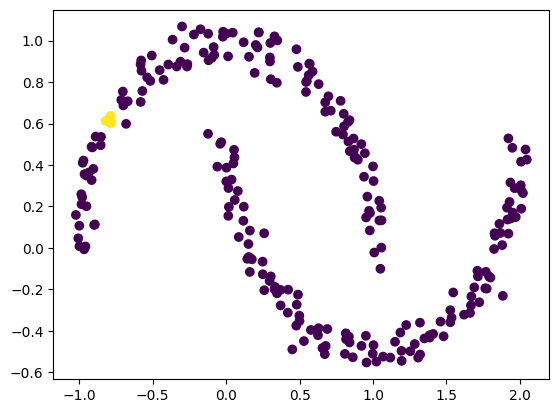

In [42]:
plt.scatter(x[:,0],x[:,1],c=dbcan.labels_)

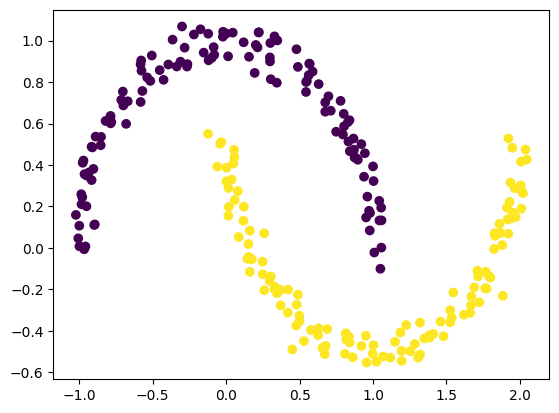

In [43]:
plt.scatter(x[:,0],x[:,1],c=y)